### Tic Tac Toe

&nbsp;

Tictactoe is a very simple game for children. In a conventional setting, two players play on a three by three grid. Whoever manages to have three marks on a column, row or diagonal wins the game.

#### Minimax/Negamax

&nbsp;

The objective here is to make the game as difficult as possible. In another word, the idea is to create a gaming AI which is sophisticated enough to beat the human player. Minimax algorithm is perfect for the job. Minimax, as suggested by the name, is to minimize the maximum loss. Inspired by DFS in graph theory, minimax is a recursive traversal algorithm on game tree. For the player round, it maximizes the AI loss for the player to win. For the AI round, it minimizes the AI loss for the AI to win. It recursively computes the optimal strategy for both player and AI to derive the best move for AI to win. You will notice there is another algo in the title called negamax. Negamax is a special case of minimax. It only works on two-player game. Negamax is a more elegant way of writing minimax. Instead of creating minimization for one player and maximization for the other player, negamax adds a negative sign to simplify the minimax based on the fact that max(a,b)=−min(−a,−b).

More details on minimax can be found in the link below

https://sandipanweb.wordpress.com/2017/03/30/using-minimax-without-pruning-to-implement-the-machine-players-to-play-tictactoe-in-computer/

Reference to DFS

https://github.com/je-suis-tm/graph-theory/blob/master/BFS%20DFS%20on%20DCG.ipynb

Reference to recursion

https://github.com/je-suis-tm/recursion-and-dynamic-programming

In [1]:
import copy
import matplotlib.pyplot as plt

##### functions

In [2]:
#check if either player has won
def check_win(current_board):
    
    dims=len(current_board)
    player_win=0
    
    #check column and row win
    for i in range(dims):
        if sum(current_board[i])==1*dims:
            player_win=1
            return player_win
        if sum(current_board[i])==-1*dims:
            player_win=-1
            return player_win
        if sum([current_board[j][i] for j in range(dims)])==1*dims:
            player_win=1
            return player_win
        if sum([current_board[j][i] for j in range(dims)])==-1*dims:
            player_win=-1
            return player_win
    
    #check diagonal win
    diag1=[current_board[i][i] for i in range(dims)]
    diag2=[current_board[i][dims-i-1] for i in range(dims)]    
    if sum(diag1)==1*dims:
        player_win=1
        return player_win
    if sum(diag1)==-1*dims:
        player_win=-1
        return player_win
    if sum(diag2)==1*dims:
        player_win=1
        return player_win
    if sum(diag2)==-1*dims:
        player_win=-1
        return player_win
        
    return player_win

In [3]:
#find valid moves
def find_possible_moves(current_board):
    possible_moves=[(i,j) for i in range(len(current_board)) for j in range(len(current_board)) if current_board[i][j]==0]
    return possible_moves

In [4]:
#dfs style traversal on game tree
def minimax(current_board,player_placement,step):

    #find possible moves for tictactoe
    possible_moves=find_possible_moves(current_board)
    
    #initialize
    scores=[] 

    #if terminal state is reached
    #compute score
    if check_win(current_board)!=0:
        return check_win(current_board)
    if len(possible_moves)==0:
        return check_win(current_board)

    #iterate through all possible moves to compute scores
    for move in possible_moves:
        next_status=copy.deepcopy(current_board)
        next_status[move[0]][move[1]]=player_placement
        scores.append(minimax(next_status,-player_placement,step+1))

    #assume the machine is player2 which the placement is one
    #when the machine wins,player_win equals to one
    #its turn is always the maximization
    if player_placement<0:
        return min(scores)
    else:
        return max(scores)

In [5]:
#pick the best move for machine
def find_best_move(game_func,current_board,
                   player_placement,**kwargs):
    
    #find possible moves for tictactoe
    possible_moves=find_possible_moves(current_board)
    
    #initialize
    scores=[]
    maxval=-float('inf')
    best_move=None 

    #if terminal state is reached
    #show result
    if len(possible_moves)==0:
        return best_move
            
    #iterate through all possible moves to find the best move    
    for move in possible_moves:
        next_status=copy.deepcopy(current_board)
        next_status[move[0]][move[1]]=player_placement
        score=game_func(next_status,-player_placement,1,**kwargs)
        if score>maxval:
            maxval=score
            best_move=move
            
    return best_move

In [6]:
#show the current state
def display_tictactoe(current_board):    
    
    #map number to text with color
    display_mapping={0:('?','gold'),-1:('O','cyan'),1:('X','red')}
    
    ax=plt.figure(figsize=(5,5)).add_subplot(111)
    
    #plot blocks
    for latitude in range(1,len(current_board)):
        plt.plot([latitude]*(len(current_board)+1),
                [-i for i in range(len(current_board)+1)],c='k')
    for longitude in range(1,len(current_board)):
        plt.plot(range(len(current_board)+1),
                 [-longitude]*(len(current_board)+1),c='k'
                )

    #show answers
    for longitude in range(len(current_board)):
        for latitude in range(len(current_board)):
            plt.text(longitude+0.5,-latitude-0.5,
                     display_mapping[current_board[latitude][longitude]][0],
                     color=display_mapping[current_board[latitude][longitude]][1],
                     ha='center',va='center',fontsize=40)

    plt.axis('off')
    plt.show()

In [7]:
#show result
def check_terminal_state(current_board): 
    stop=False
    result=check_win(current_board)
    if result>0:
        print('\n\nYou lost')
        stop=True
        return stop
    if result<0:
        print('\nYou won')
        stop=True
        return stop
    if len(find_possible_moves(current_board))==0:
        stop=True
        print('\nDraw')        
    return stop

##### play

In [8]:
#initialize
current_board=[[0,0,0,],
           [0,0,0,],
           [0,0,0,],]

player_placement=-1


~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~
round 0
the current state is

you are o in the board



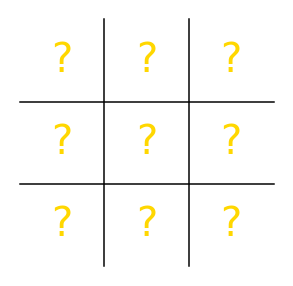


please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being 2,2

your move is 0,0
after your move, the current state is



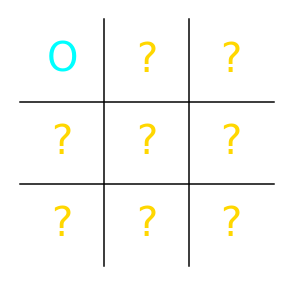


your opponent has moved
its move is 1,1

~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~
round 1
the current state is

you are o in the board



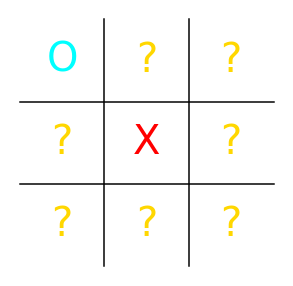


please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being 2,2

your move is 0,1
after your move, the current state is



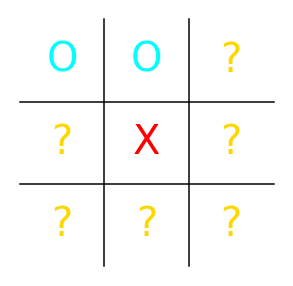


your opponent has moved
its move is 0,2

~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~
round 2
the current state is

you are o in the board



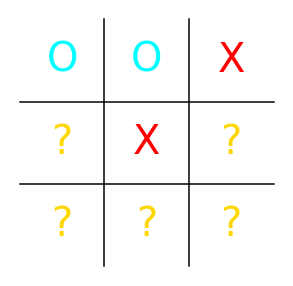


please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being 2,2

your move is 2,2
after your move, the current state is



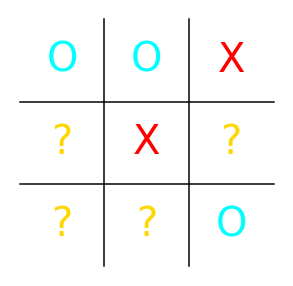


your opponent has moved
its move is 1,0

~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~
round 3
the current state is

you are o in the board



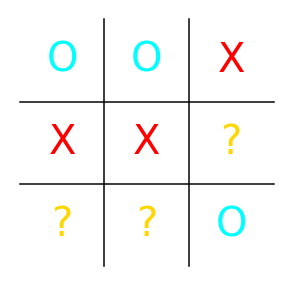


please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being 2,2

your move is 2,1
after your move, the current state is



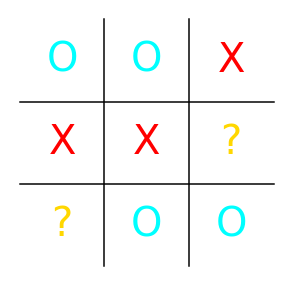


your opponent has moved
its move is 1,2


You lost


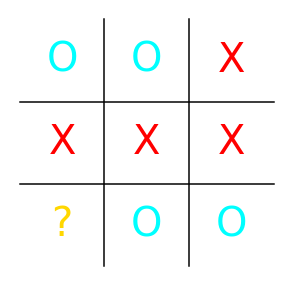

In [9]:
stop=False
round_counter=0
while not stop:
    
    print('\n~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~')
    print(f'round {round_counter}')
    
    #show status quo
    print("the current state is\n")
    print(f"you are {'o' if player_placement==-1 else 'x'} in the board\n")
    display_tictactoe(current_board)   
        
    #collect user input
    player1_input=input(f"""
please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being {len(current_board)-1},{len(current_board)-1}\n
your move is """)

    #convert to indices and update the board status
    move=tuple(map(int,player1_input.split(',')))
    if current_board[move[0]][move[1]]!=0:
        print("\ninvalid move, you lost\n")
        stop=True
        break
    current_board[move[0]][move[1]]=player_placement
    
    #show user input
    print('after your move, the current state is\n')
    display_tictactoe(current_board)
    
    #show result
    stop=check_terminal_state(current_board)
    if stop:
        break
    
    #use minimax to find the best move
    move=find_best_move(minimax,current_board,-player_placement)
    current_board[move[0]][move[1]]=-player_placement
    print(f'\nyour opponent has moved\nits move is {move[0]},{move[1]}')
    
    #show result
    stop=check_terminal_state(current_board)
    if stop:
        display_tictactoe(current_board)
        break
        
    round_counter+=1

#### Alpha-Beta Pruning

&nbsp;

Alpha–beta pruning is an improvement on the minimax algorithm. The pruning intends to optimize the game tree traversal via reducing the branches. Some branches are not worth the time to investigate simply because their predecessors (sibling branches) are the better move with higher payoff. 

Let's use a good example to illustrate why alpha-beta pruning works. Assume we have a binary tree, the root, denoted as $R$, is a maximization layer. The first level is minimization layer. The left branch of the first level, denoted as $B^l_1$, is a terminal node which scores 5. As for the right branch, let's denote the right branch at the first level as $B^r_1$. We go one level deeper. At the second level, the left branch of $B^r_1$, denoted as $B^l_2$, scores 2. Now we can ignore everything on the right branch of $B^r_1$, denoted as $B^r_2$. Why? Because the first level is a minimization layer. There are two scenarios for $B^r_2$. If $B^r_2$ > $B^l_2$, $B^r_2$ will not matter, since $B^r_1 = min (B^r_2 , B^l_2)$ which is equivalent to $B^r_1 = B^l_2$. If $B^r_2$ < $B^l_2$, we can derive $B^r_1 = B^r_2$. However, the root level is a maximization layer, indicating $R = max(B^r_1 , B^l_1)$. Given $B^l_1=5$ and $B^r_2$ < $B^l_2 = 2$, the root $R$ inevitably will pick the move that leads to the left branch $B^l_1$ because $min (B^r_2 , B^l_2)$ will never be larger than 2 regardless of the value of $B^r_2$. Hence, there is no point to understand the actual payoff from the branch $B^r_2$.

A good material on alpha-beta pruning can be found in the link below

https://www.mygreatlearning.com/blog/alpha-beta-pruning-in-ai/

##### functions

In [10]:
#dfs style traversal on game tree
def alpha_beta_pruning(current_board,player_placement,step):

    #find possible moves for tictactoe
    possible_moves=find_possible_moves(current_board)
    
    #initialize
    scores=[] 

    #if terminal state is reached
    #compute score
    if check_win(current_board)!=0:
        return check_win(current_board)
    if len(possible_moves)==0:
        return check_win(current_board)

    #iterate through all possible moves to compute scores
    for move in possible_moves:
        next_status=copy.deepcopy(current_board)
        next_status[move[0]][move[1]]=player_placement
        
        #alpha beta pruning for tictactoe is a lot easier
        #since the score will only be -1,0 or 1
        #whenever -1 appears in the minimization layer
        #or 1 appears in the maximization layer
        #we can prune off rest of the branches
        current_score=minimax(next_status,-player_placement,step+1)
        if player_placement<0 and current_score==-1:
            return -1
        if player_placement>0 and current_score==1:
            return 1
        scores.append(current_score)

    #assume the machine is player2 which the placement is one
    #when the machine wins,player_win equals to one
    #its turn is always the maximization
    if player_placement<0:
        return min(scores)
    else:
        return max(scores)

##### compare

In [11]:
#initialize
current_board=[[0,0,0,],
           [0,-1,0,],
           [0,0,0,],]

player_placement=-1

In [12]:
%timeit find_best_move(minimax,current_board,-player_placement)

2.07 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
#alpha beta pruning is significantly faster
#it only takes half of the time that minimax requires
%timeit find_best_move(alpha_beta_pruning,current_board,-player_placement)

1.14 s ± 90.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Depth Limited Search

&nbsp;

Depth limited search is an optimized minimax, a tradeoff between accuracy and efficiency. An empty 3 by 3 board has 9! scenarios which is a bit computational expensive. To reduce the time complexity, the algorithm stops at the preset depth instead of a full game tree traversal. When a node is not a terminal node, DLS leverages evaluation function to estimate the potential outcome of the game. The choice of evaluation function is crucial to DLS. Ideally, the evaluation function should have low time complexity compared to the minimax and reflect a relatively accurate estimation of the potential outcome. A good choice of evaluation function of tictactoe would be the calculation of how many slots are occupied by the opponent in each row/column/diagonal.

##### functions

In [14]:
#an evaluation function to replace game tree search to the terminal
def tictactoe_score(current_board,player_placement):
    
    dims=len(current_board)
    score=0
    
    #the scoring system is simple
    #if every slot in the row/col/diag is filled by the player
    #thats -100 and the opponent wins, vice versa
    #if ai and the player have occupied at least one slot in the row/col/diag
    #zero point as nobody can win from this row/col/diag
    #if only ai or the player have occupied some slots in the row/col/diag
    #calculate the occupied slots
    #a special case would be player merely needs one more slot to win
    #if the next round is player s round
    #player wins, vice versa
    for i in range(dims):
        
        #compute row score
        row=current_board[i]
        if sum(row)==1*dims:
            score=100
            return score
        elif sum(row)==-1*dims:
            score=-100
            return score
        elif 1 in row and -1 in row:
            score+=0
        elif sum(row)==1*(dims-1) and player_placement==1:
            score=100
            return score
        elif sum(row)==-1*(dims-1) and player_placement==-1:
            score=-100
            return score
        else:            
            score+=sum(row)
        
        #compute col score
        col=[current_board[j][i] for j in range(dims)]
        if sum(col)==1*dims:
            score=100
            return score
        elif sum(col)==-1*dims:
            score=-100
            return score
        elif 1 in col and -1 in col:
            score+=0
        elif sum(col)==1*(dims-1) and player_placement==1:
            score=100
            return score
        elif sum(col)==-1*(dims-1) and player_placement==-1:
            score=-100
            return score
        else:
            score+=sum(col)
    
    #compute diag score
    diag1=[current_board[i][i] for i in range(dims)]
    diag2=[current_board[i][dims-i-1] for i in range(dims)]    
    if sum(diag1)==1*dims:
        score=100
        return score
    elif sum(diag1)==-1*dims:
        score=-100
        return score
    elif 1 in diag1 and -1 in diag1:
        score+=0
    elif sum(diag1)==1*(dims-1) and player_placement==1:
        score=100
        return score
    elif sum(diag1)==-1*(dims-1) and player_placement==-1:
        score=-100
        return score
    else:
        score+=sum(diag1)            
    if sum(diag2)==1*dims:
        score=100
        return score
    elif sum(diag2)==-1*dims:
        score=-100
        return score
    elif 1 in diag2 and -1 in diag2:
        score+=0
    elif sum(diag2)==1*(dims-1) and player_placement==1:
        score=100
        return score
    elif sum(diag2)==-1*(dims-1) and player_placement==-1:
        score=-100
        return score
    else:
        score+=sum(diag2)       
    return score

In [15]:
#an optimized minimax to improve time complexity
def depth_limited_search(current_board,player_placement,
                         current_step,eval_func=tictactoe_score,max_step=3):
    
    #limit the depth
    if current_step>max_step:
        
        #it is always better to win asap
        #assign depth as weight to score
        #for negative score, use multiplication to achieve smaller value
        final_score=eval_func(current_board,-player_placement)
        if final_score>0:
            return final_score/current_step
        else:
            return final_score*current_step

    #find possible moves for tictactoe
    possible_moves=find_possible_moves(current_board)
    
    #initialize
    scores=[] 

    #if terminal state is reached
    #compute score
    if check_win(current_board)!=0:
        final_score=eval_func(current_board,-player_placement)
        if final_score>0:
            return final_score/current_step
        else:
            return final_score*current_step
    if len(possible_moves)==0:
        final_score=eval_func(current_board,-player_placement)
        if final_score>0:
            return final_score/current_step
        else:
            return final_score*current_step

    #iterate through all possible moves to compute scores
    for move in possible_moves:
        next_status=copy.deepcopy(current_board)
        next_status[move[0]][move[1]]=player_placement
        scores.append(depth_limited_search(
            next_status,-player_placement,current_step+1))

    #assume the machine is player2 which the placement is one
    #when the machine wins,player_win equals to one
    #its turn is always the maximization
    if player_placement<0:
        return min(scores)
    else:
        return max(scores)

##### compare

In [16]:
#initialize
current_board=[[1,0,0,],
           [0,0,0,],
           [0,0,-1,],]

player_placement=-1

In [17]:
%timeit find_best_move(alpha_beta_pruning,current_board,-player_placement)

248 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
#dls is significantly faster as we limit the tree depth
%timeit find_best_move(depth_limited_search,current_board,-player_placement,)

29.6 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
